In [31]:
import numpy as np
import h5py as h5
import sys
import time
import matplotlib.pyplot as plt 


In [32]:
# -- visit function for h5 viewing the structure of files
def visit_func(name, node):
    '''
    Return all groups and datasets name and shapes of h5 file called name
    '''
    if isinstance(node, h5.Group):
        print(node.name)
    elif isinstance(node, h5.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'is an object Dataset')
        else:
            print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')
        
        
def assemble_image(imgs):
    """
    return the assembled image of size [2080,2080]
    with the 4 epix
    input: list of 4 epix map
    output: map of size (2080,2080) assembled
    """
    shape = [704,768]
    edge  = [170,140]
    frame = np.zeros([2080,2080])
    #epix1
    frame[  edge[0]:shape[0]+edge[0],  edge[1]:shape[1]+edge[1]] = np.rot90( imgs[0] , 2)
    #epix2
    frame[  edge[0]:shape[0]+edge[0],-edge[1]-shape[1]:-edge[1]] = np.rot90( imgs[1] , 2)
    #epix3
    frame[-edge[0]-shape[0]:-edge[0],  edge[1]:shape[1]+edge[1]] = imgs[2]
    #epix4
    frame[-edge[0]-shape[0]:-edge[0],-edge[1]-shape[1]:-edge[1]] =  imgs[3] 
    return frame

In [33]:
ls /sdf/data/lcls/ds/xpp/xppl1001021/results/shared/output/

contrast_run_43_epix_5.npz  contrast_run_67_epix_5.npz
contrast_run_46_epix_5.npz  contrast_run_68_epix_5.npz
contrast_run_46.npz         images/


In [35]:

exp_name = 'xppl1001021'
run_num=68
N_epix=4
output_path = '/sdf/data/lcls/ds/xpp/{}/results/shared/output/'.format(exp_name)


In [36]:
data = np.load(output_path+'contrast_run_{}_epix_5.npz'.format(run_num))

In [37]:
kbar=data['kbar']
beta=data['beta']
#p0=data['p0']
#p1=data['p1']
#p2=data['p2']
#p3=data['p3']




/tmp/ipykernel_3349135/689761380.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


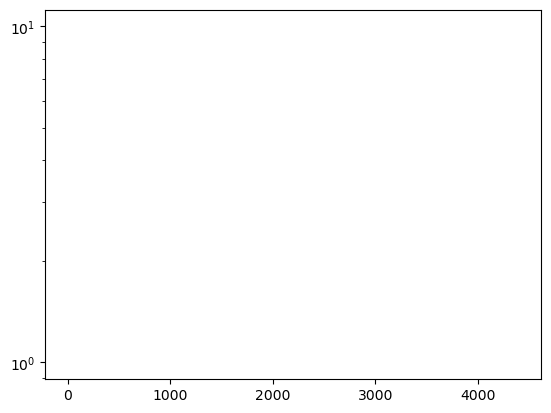

In [38]:
plt.figure()
plt.plot(kbar,marker='o',ls='',mec='k',mew=.3)

plt.yscale('log')


In [39]:
kbar

array([0., 0., 0., ..., 0., 0., 0.])

Text(0, 0.5, '$\\beta_{var}$')

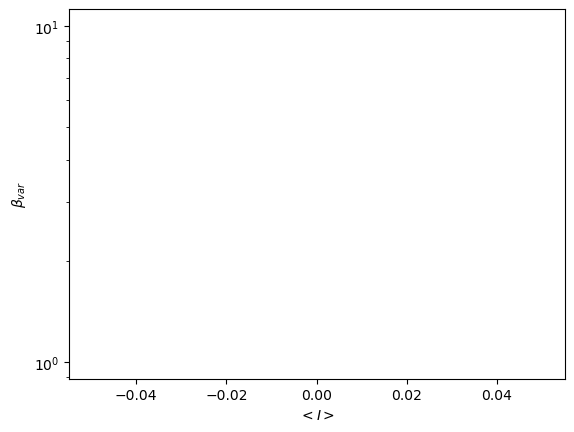

In [40]:
plt.figure()
plt.plot(kbar,beta,marker='o',ls='',mec='k',mew=.3)


plt.yscale('log')
plt.xlabel('$<I>$')
plt.ylabel(r'$\beta_{var}$')

#plt.ylim(0,10)

In [10]:
def photon_probability(beta,kbar):
    M = 1./beta
    p1 = M*(1+M/kbar)**(-1)*(1+kbar/M)**(-M)
    p2 = M*(M+1)/2*(1+M/kbar)**(-2)*(1+kbar/M)**(-M)
    return p1,p2


Text(0.5, 0, '$\\langle I \\rangle$ (count/pixel)')

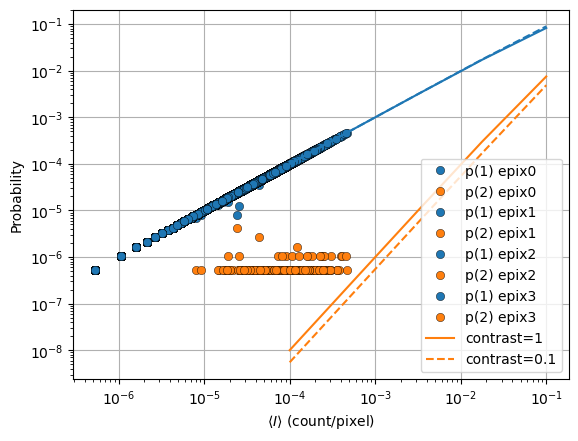

In [11]:

kbar_est = np.logspace(-4,-1,5)

contrast0=1
contrast1=.1


p1_0,p2_0 = photon_probability(contrast0,kbar_est)
p1_1,p2_1 = photon_probability(contrast1,kbar_est)

plt.figure()
#plt.plot(kbar,p0,marker='o',ls='')
for epix in range(N_epix):
    plt.plot(kbar[epix,:],p1[epix,:],marker='o',ls='',color='C0',label='p(1) epix'+str(epix),mec='k',mew=.3)
    plt.plot(kbar[epix,:],p2[epix,:],marker='o',ls='',color='C1',label='p(2) epix'+str(epix),mec='k',mew=.3)
#plt.plot(kbar,p3,marker='o',ls='')

plt.plot(kbar_est,p1_0,color='C0')
plt.plot(kbar_est,p2_0,color='C1',label='contrast='+str(contrast0))

plt.plot(kbar_est,p1_1,color='C0',ls='dashed')
plt.plot(kbar_est,p2_1,color='C1',ls='dashed',label='contrast='+str(contrast1))

#plt.plot(kbar_rebinned,p2_rebinned,marker='s',ls='',c='k')
#plt.plot(kbar_rebinned,p1_rebinned,marker='s',ls='',c='k')

#plt.hlines([1e-4,2e-4,3.5e-4,5.2e-4,],0,1)

plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.ylabel('Probability')
plt.xlabel(r'$\langle I \rangle$ (count/pixel)')


#plt.ylim(0,10)

In [12]:
bins_int = np.logspace(-5.5,-2.5,20)
p1_rebinned,p2_rebinned,kbar_rebinned =[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]


for epix in range(N_epix):
    for i in range(len(bins_int)-1):
        p1_rebinned[epix].append(np.mean( p1[epix,(kbar[epix,:]>bins_int[i])&(kbar[epix,:]<bins_int[i+1])]))
        p2_rebinned[epix].append(np.mean(p2[epix,(kbar[epix,:]>bins_int[i])&(kbar[epix,:]<bins_int[i+1])]))
        kbar_rebinned[epix].append(np.mean(kbar[epix,(kbar[epix,:]>bins_int[i])&(kbar[epix,:]<bins_int[i+1])]))

/sdf/group/lcls/ds/ana/sw/conda1/inst/envs/ana-4.0.54-py3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/sdf/group/lcls/ds/ana/sw/conda1/inst/envs/ana-4.0.54-py3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, '$\\langle I \\rangle$ (count/pixel)')

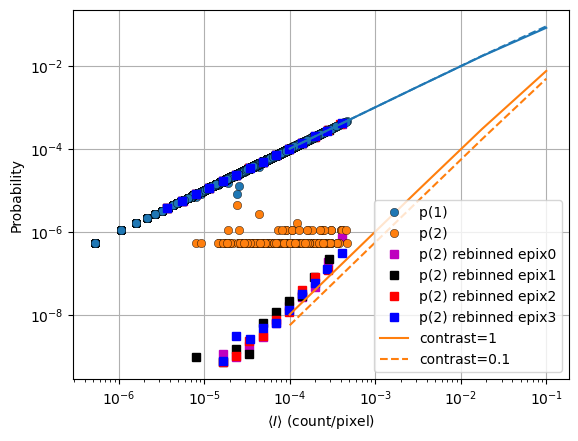

In [13]:

col=['m','k','r','b']

plt.figure()
#plt.plot(kbar,p0,marker='o',ls='')
epix=0
plt.plot(kbar[epix,:],p1[epix,:],marker='o',ls='',color='C0',label='p(1) ',mec='k',mew=.3)
plt.plot(kbar[epix,:],p2[epix,:],marker='o',ls='',color='C1',label='p(2) ',mec='k',mew=.3)

for epix in range(N_epix):
    plt.plot(kbar[epix,:],p1[epix,:],marker='o',ls='',color='C0',mec='k',mew=.3)
    plt.plot(kbar[epix,:],p2[epix,:],marker='o',ls='',color='C1',mec='k',mew=.3)
    plt.plot(kbar_rebinned[epix],p2_rebinned[epix],marker='s',ls='',c=col[epix])
    plt.plot(kbar_rebinned[epix],p1_rebinned[epix],marker='s',ls='',c=col[epix],label='p(2) rebinned epix'+str(epix))

    
    
    #plt.plot(kbar,p3,marker='o',ls='')

plt.plot(kbar_est,p1_0,color='C0')
plt.plot(kbar_est,p2_0,color='C1',label='contrast='+str(contrast0))

plt.plot(kbar_est,p1_1,color='C0',ls='dashed')
plt.plot(kbar_est,p2_1,color='C1',ls='dashed',label='contrast='+str(contrast1))


#plt.hlines([1e-4,2e-4,3.5e-4,5.2e-4,],0,1)

plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.ylabel('Probability')
plt.xlabel(r'$\langle I \rangle$ (count/pixel)')